In [7]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

data_idx = 3

iou = {}
with open('results/full/MOSSE_deep_features_0_filter_region_1.0_r_search_0.0.pkl', 'rb') as f: 
    iou['deep0'] = pickle.loads(f.read())

with open('results/full/MOSSE_deep_features_1_filter_region_1.0_r_search_0.0.pkl', 'rb') as f: 
    iou['deep1_1'] = pickle.loads(f.read())

with open('results/full/MOSSE_deep_features_1_filter_region_2.0_r_search_0.0.pkl', 'rb') as f: 
    iou['deep1_2'] = pickle.loads(f.read())

with open('results/full/MOSSE_deep_features_1_filter_region_3.0_r_search_0.0.pkl', 'rb') as f: 
    iou['deep1_3'] = pickle.loads(f.read())

with open('results/full/MOSSE_deep_features_2_filter_region_1.0_r_search_0.0.pkl', 'rb') as f: 
    iou['deep2'] = pickle.loads(f.read())

with open('results/full/MOSSE_grayscale_filter_region_1.0_r_search_0.0.pkl', 'rb') as f: 
    iou['gray_1_0'] = pickle.loads(f.read())

with open('results/full/MOSSE_grayscale_filter_region_1.0_r_search_10.0.pkl', 'rb') as f: 
    iou['gray_1_10'] = pickle.loads(f.read())

with open('results/full/MOSSE_grayscale_filter_region_2.0_r_search_0.0.pkl', 'rb') as f:
    iou['gray_2_0'] = pickle.loads(f.read())

with open('results/full/MOSSE_rgb_filter_region_1.0_r_search_0.0.pkl', 'rb') as f: 
    iou['rgb_1_0'] = pickle.loads(f.read())

with open('results/full/MOSSE_rgb_filter_region_1.0_r_search_10.0.pkl', 'rb') as f: 
    iou['rgb_1_10'] = pickle.loads(f.read())

with open('results/full/MOSSE_rgb_filter_region_2.0_r_search_0.0.pkl', 'rb') as f:
    iou['rgb_2_0'] = pickle.loads(f.read())

with open('results/full/MOSSE_rgb_filter_region_3.0_r_search_0.0.pkl', 'rb') as f:
    iou['rgb_3_0'] = pickle.loads(f.read())

with open('results/full/MOSSE_colornames_filter_region_1.0_r_search_0.0.pkl', 'rb') as f: 
    iou['colornames_1_0'] = pickle.loads(f.read())

with open('results/full/MOSSE_colornames_filter_region_1.0_r_search_10.0.pkl', 'rb') as f: 
    iou['colornames_1_10'] = pickle.loads(f.read())

with open('results/full/MOSSE_colornames_filter_region_2.0_r_search_0.0.pkl', 'rb') as f: 
    iou['colornames_2_0'] = pickle.loads(f.read())

with open('results/full/NCC.pkl', 'rb') as f: 
    iou['ncc'] = pickle.loads(f.read())


Means:
deep1_2: 0.47262181750574467
rgb_2_0: 0.47262181750574467
gray_2_0: 0.4528922580861198
deep1_1: 0.43582365114376703
rgb_1_0: 0.43582365114376703
colornames_2_0: 0.43185570591605277
ncc: 0.42437170981408545
rgb_1_10: 0.4147649477153309
colornames_1_0: 0.4082677532947689
colornames_1_10: 0.4006542366940857
deep2: 0.3804870643673465
gray_1_10: 0.37966762974113405
deep0: 0.3615459650070943
gray_1_0: 0.35839270151734315
deep1_3: 0.341602052711149
rgb_3_0: 0.341602052711149

Stds:
gray_2_0: 0.3847142359723873
deep1_2: 0.37794812482258533
rgb_2_0: 0.37794812482258533
colornames_2_0: 0.3565365831223815
deep1_3: 0.3535690955109015
rgb_3_0: 0.3535690955109015
deep0: 0.3158808061957344
deep2: 0.3080205187076866
ncc: 0.3056154257115315
deep1_1: 0.30256861395309353
rgb_1_0: 0.30256861395309353
colornames_1_0: 0.3023007226992851
rgb_1_10: 0.27947509886346455
gray_1_0: 0.2747587917015122
colornames_1_10: 0.27361570824381265
gray_1_10: 0.2627473420296525


[]

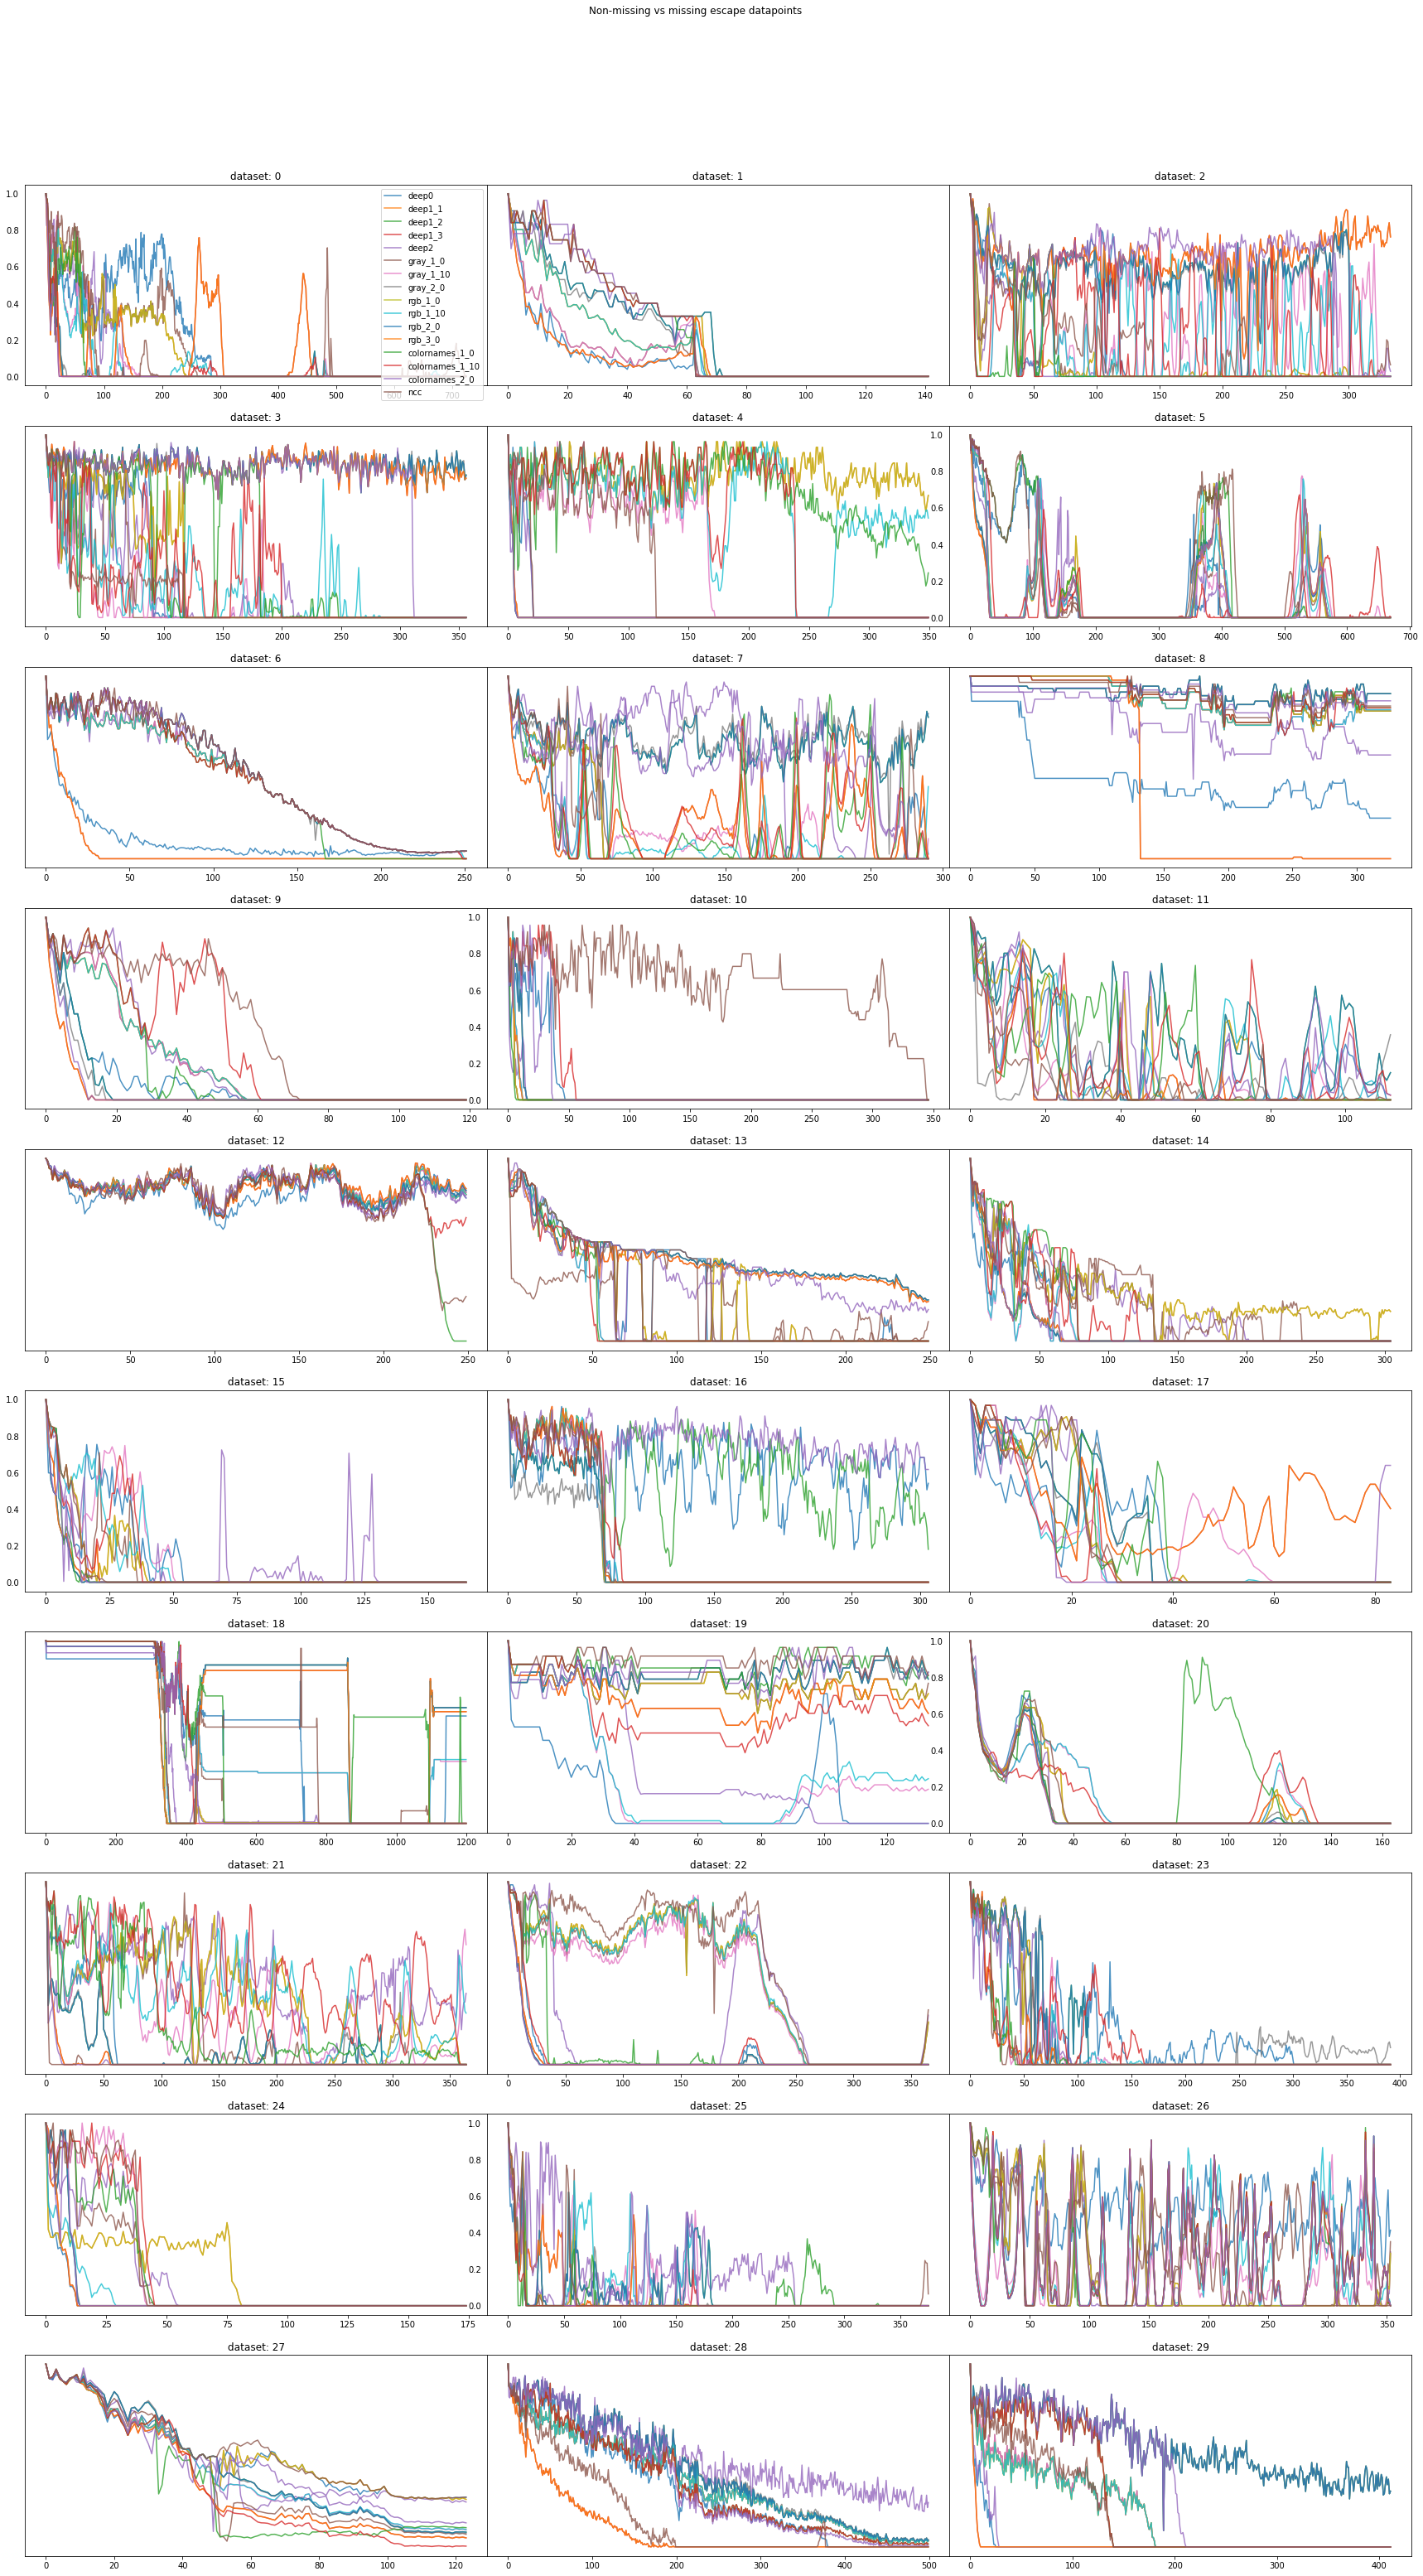

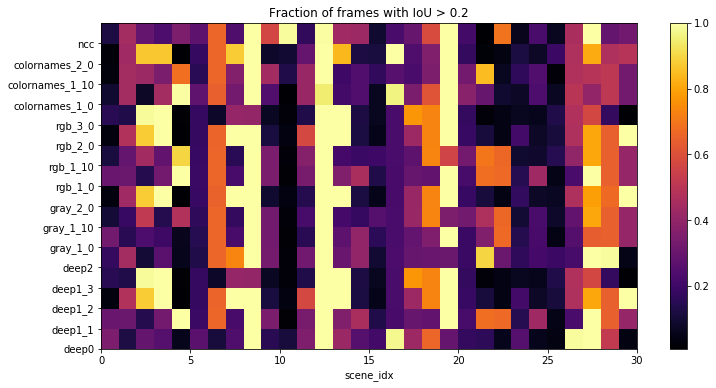

In [8]:
fig = plt.figure(figsize=(30,50))
fig.subplots_adjust(hspace=0.2, wspace=0, top=0.92)
fig.suptitle('Non-missing vs missing escape datapoints')

threshold = 0.2
iou_over_threshold = {}
for i, data_idx in enumerate(list(range(0,30))):
    ax = fig.add_subplot(10, 3, i+1)
    for tracker, data in iou.items():
        ax.plot(range(len(data[data_idx])), data[data_idx], alpha=0.8)
    ax.title.set_text(f'dataset: {data_idx}')

    if i==0:
        ax.legend(labels=iou.keys())
    if i%5==0:
        ax.tick_params(left = False, right = False , labelleft = True ,
                labelbottom = True, bottom = True)
    else:
        ax.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = True, bottom = True)

summary_statistics_mean = {}
summary_statistics_std = {}
sorted_iou = {}
non_sorted_iou = {}
with open("best_scenes.txt", "w") as out:
    for tracker, data in iou.items():
        res = {}
        for i in data:
            res[i] = np.mean([1 if x>threshold else 0 for x in data[i]])
        
        non_sorted_iou[tracker] = res
        sorted_iou[tracker] = dict(sorted(res.items(), key=lambda x:x[1], reverse=True))
        iou_over_threshold_mean, std = np.mean(np.array(list(res.values()))), np.std(np.array(list(res.values())))
        summary_statistics_mean[tracker] = iou_over_threshold_mean
        summary_statistics_std[tracker] = std
        out.write(f'{tracker}:  \n')
        [out.write(f'{key}: {val}\n') for key, val in sorted_iou[tracker].items()]
        out.write('\n\n')


sorted_mean = dict(sorted(summary_statistics_mean.items(), key=lambda x:x[1], reverse=True))
sorted_std = dict(sorted(summary_statistics_std.items(), key=lambda x:x[1], reverse=True))

print('Means:')
[print(f'{key}: {val}') for key, val in sorted_mean.items()]
print('\nStds:')
[print(f'{key}: {val}') for key, val in sorted_std.items()]

# fig, (ax0, ax1) = plt.subplots(2, 1)

# c = ax0.pcolor(Z)
# ax0.set_title('default: no edges')

# c = ax1.pcolor(Z, edgecolors='k', linewidths=4)
# ax1.set_title('thick edges')
res_matrix = np.array([list(x.values()) for x in list(non_sorted_iou.values())])

fig = plt.figure(figsize=(12,6))
plt.title('Fraction of frames with IoU > 0.2')
plt.pcolor(res_matrix, cmap='inferno')
plt.yticks(ticks=range(len(res_matrix)),labels=[x for x in iou.keys()])
plt.xlabel('scene_idx')
plt.colorbar()
plt.savefig('results/figures/2d_score_map.png', dpi=400)
plt.plot()






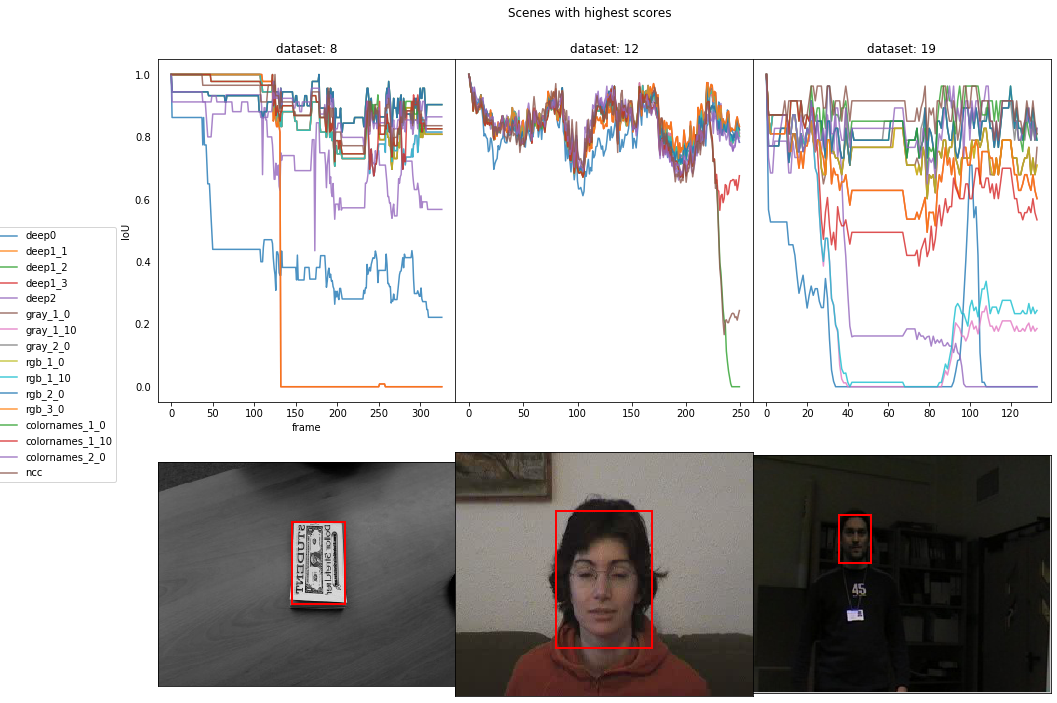

In [9]:
from cvl.dataset import OnlineTrackingBenchmark
from matplotlib import patches
import cv2

dataset_path = "Mini-OTB"
dataset = OnlineTrackingBenchmark(dataset_path)

fig = plt.figure(figsize=(16,12))
fig.subplots_adjust(hspace=0, wspace=0, top=0.92)
fig.suptitle('Scenes with highest scores')

best = [8, 12, 19]
worst = [10, 24, 25]
mixed = [3, 4, 29]

iou_subset = {k: iou[k] for k in ('deep1_2', 'rgb_2_0', 'gray_2_0', 'colornames_2_0', 'rgb_3_0', 'deep1_3', 'gray_1_0')}

for i, data_idx in enumerate(best):
    ax1 = fig.add_subplot(2, 3, i+1)

    for tracker, data in iou.items():
        ax1.plot(range(len(data[data_idx])), data[data_idx], alpha=0.8)
    ax1.title.set_text(f'dataset: {data_idx}')


    ax2 = fig.add_subplot(2, 3, i+4)

    frame = dataset[data_idx][0]
    image = frame['image']
    bbox = frame['bounding_box']
    rect = patches.Rectangle((bbox.xpos, bbox.ypos), bbox.width, bbox.height, linewidth=2, edgecolor='r', facecolor='none')
    ax2.imshow(image)
    ax2.add_patch(rect)

    if i==0:
        fig.legend(labels=iou.keys(), bbox_to_anchor=(-0.01, 0.25), loc="lower left")
        ax1.tick_params(left = False, right = False , labelleft = True,labelbottom = True, bottom = True)
        ax1.set_ylabel('IoU')
        ax1.set_xlabel('frame')

    else:
        ax1.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = True, bottom = True)
        
    ax2.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
    
    fig.savefig('results/figures/best.png', dpi=400)


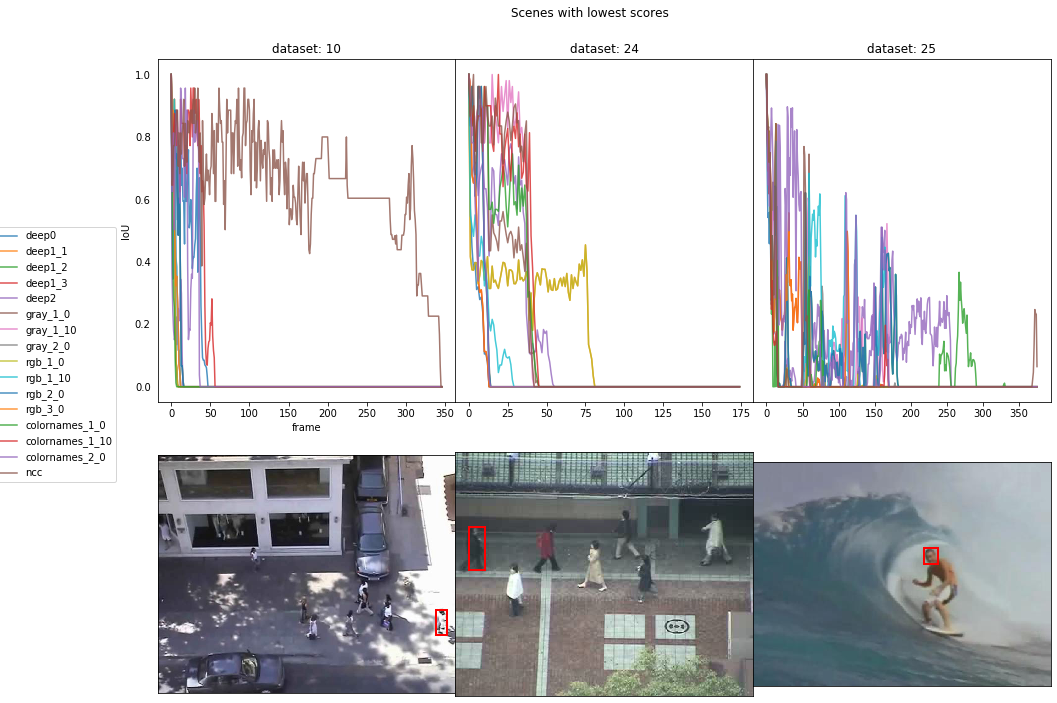

In [10]:
from cvl.dataset import OnlineTrackingBenchmark

dataset_path = "Mini-OTB"
dataset = OnlineTrackingBenchmark(dataset_path)

fig = plt.figure(figsize=(16,12))
fig.subplots_adjust(hspace=0, wspace=0, top=0.92)
fig.suptitle('Scenes with lowest scores')

best = [8, 12, 19]
worst = [10, 24, 25]
mixed = [3, 4, 29]

for i, data_idx in enumerate(worst):
    ax1 = fig.add_subplot(2, 3, i+1)

    for tracker, data in iou.items():
        ax1.plot(range(len(data[data_idx])), data[data_idx], alpha=0.8)
    ax1.title.set_text(f'dataset: {data_idx}')

    ax2 = fig.add_subplot(2, 3, i+4)

    frame = dataset[data_idx][0]
    image = frame['image']
    bbox = frame['bounding_box']
    rect = patches.Rectangle((bbox.xpos, bbox.ypos), bbox.width, bbox.height, linewidth=2, edgecolor='r', facecolor='none')
    ax2.imshow(image)
    ax2.add_patch(rect)

    if i==0:
        fig.legend(labels=iou.keys(), bbox_to_anchor=(-0.01, 0.25), loc="lower left")
        ax1.tick_params(left = False, right = False , labelleft = True,labelbottom = True, bottom = True)
        ax1.set_ylabel('IoU')
        ax1.set_xlabel('frame')
    else:
        ax1.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = True, bottom = True)
        
    ax2.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
    
fig.savefig('results/figures/worst.png', dpi=400)



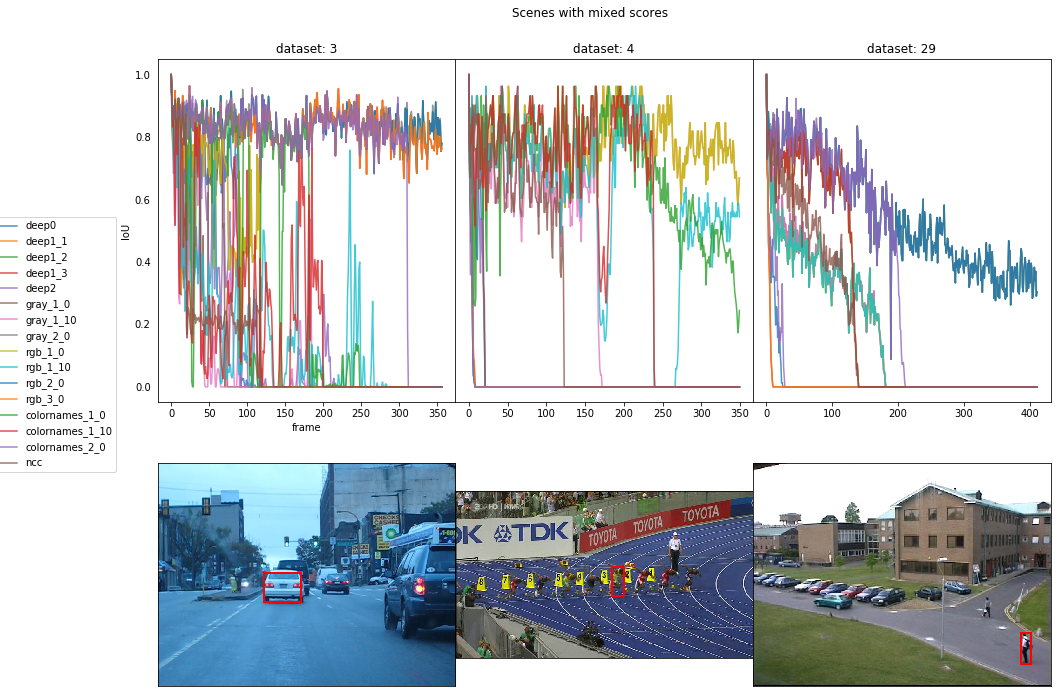

In [11]:
from cvl.dataset import OnlineTrackingBenchmark

dataset_path = "Mini-OTB"
dataset = OnlineTrackingBenchmark(dataset_path)

fig = plt.figure(figsize=(16,12))
fig.subplots_adjust(hspace=0, wspace=0, top=0.92)
fig.suptitle('Scenes with mixed scores')

best = [8, 12, 19]
worst = [10, 24, 25]
mixed = [3, 4, 29]

for i, data_idx in enumerate(mixed):
    ax1 = fig.add_subplot(2, 3, i+1)

    for tracker, data in iou.items():
        ax1.plot(range(len(data[data_idx])), data[data_idx], alpha=0.8)
    ax1.title.set_text(f'dataset: {data_idx}')

    ax2 = fig.add_subplot(2, 3, i+4)

    frame = dataset[data_idx][0]
    image = frame['image']
    bbox = frame['bounding_box']
    rect = patches.Rectangle((bbox.xpos, bbox.ypos), bbox.width, bbox.height, linewidth=2, edgecolor='r', facecolor='none')
    ax2.imshow(image)
    ax2.add_patch(rect)

    if i==0:
        fig.legend(labels=iou.keys(), bbox_to_anchor=(-0.01, 0.25), loc="lower left")
        ax1.tick_params(left = False, right = False , labelleft = True,labelbottom = True, bottom = True)
        ax1.set_ylabel('IoU')
        ax1.set_xlabel('frame')
    else:
        ax1.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = True, bottom = True)
        
    ax2.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
    
fig.savefig('results/figures/mixed.png', dpi=400)

